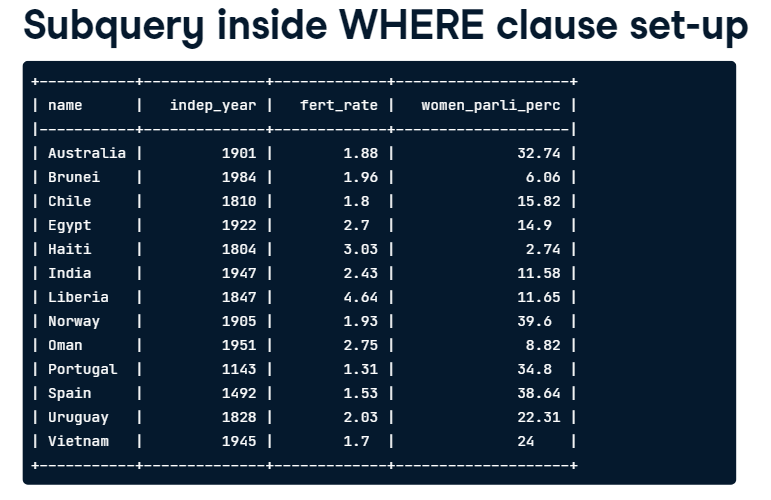
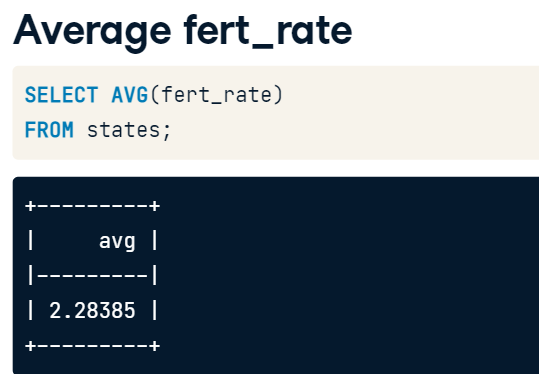
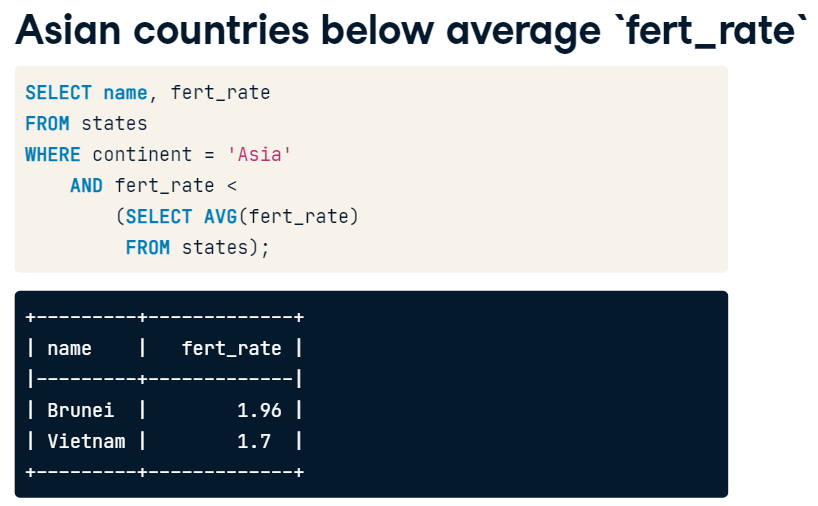
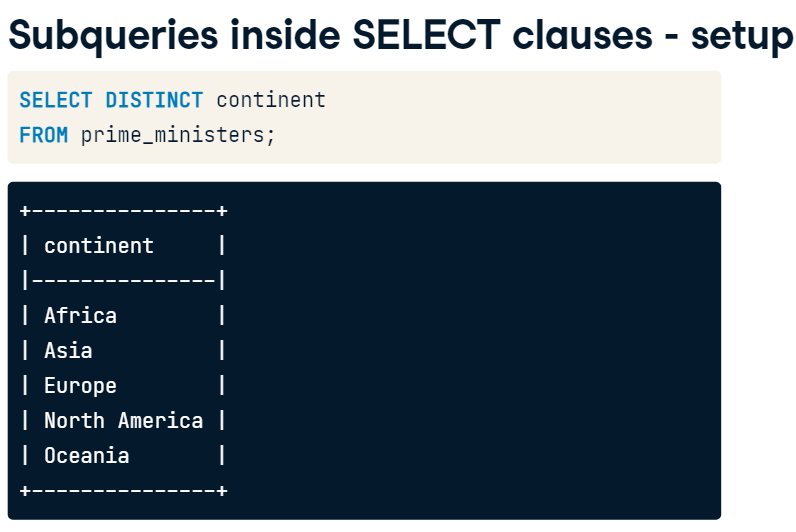
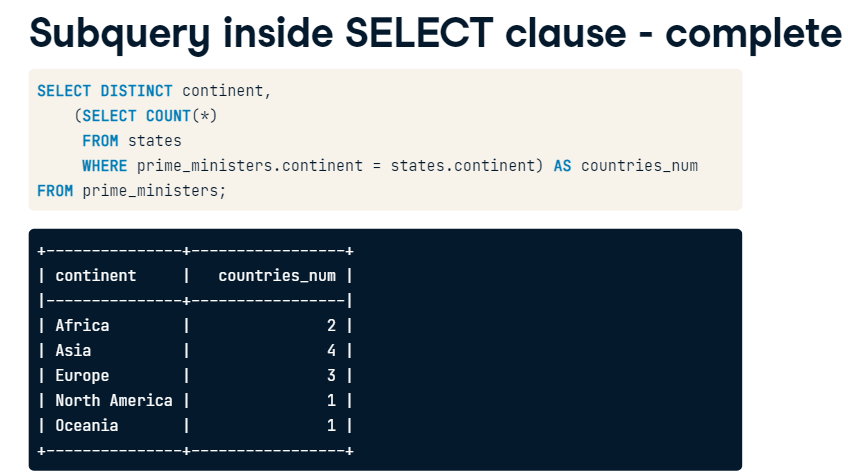
#### Subquery inside where
You'll now try to figure out which countries had high average life expectancies (at the country level) in 2015.

- Begin by calculating the average life expectancy across all countries for 2015.
```
SELECT AVG(life_expectancy)
  FROM populations
WHERE year = 2015;
```
- Recall that you can use SQL to do calculations for you. Suppose we wanted only records that were above 1.15 * 100 in terms of life expectancy for 2015:

```
SELECT *
  FROM populations
WHERE life_expectancy > 1.15 * 100
  AND year = 2015;
 ```
**Select all fields from populations with records corresponding to larger than 1.15 times the average you calculated in the first task for 2015. In other words, change the 100 in the example above with a subquery.**

```
SELECT *
  FROM populations
WHERE life_expectancy >
  1.15 * (SELECT AVG(life_expectancy)
   FROM populations
   WHERE year = 2015) AND
  year = 2015;
 ```
**Use your knowledge of subqueries in WHERE to get the urban area population for only capital cities.**
- Make use of the capital field in the countries table in your subquery.
- Select the city name, country code, and urban area population fields.

```
SELECT name, country_code, urbanarea_pop
  FROM cities
WHERE name IN
  (SELECT capital
   FROM countries)
ORDER BY urbanarea_pop DESC;
```

#### Subquery inside select
In this exercise, you'll see how some queries can be written using either a join or a subquery.

You have seen previously how to use GROUP BY with aggregate functions and an inner join to get summarized information from multiple tables.

The code given below selects the top nine countries in terms of number of cities appearing in the cities table. Recall that this corresponds to the most populous cities in the world.
```
SELECT countries.name AS country, COUNT(*) AS cities_num
  FROM cities
    INNER JOIN countries
    ON countries.code = cities.country_code
GROUP BY country
ORDER BY cities_num DESC, country
LIMIT 9;
```
We can convert the code above:

- Convert the GROUP BY code to use a subquery inside of SELECT, i.e. fill in the blanks to get a result that matches the one given using the GROUP BY code in the first query.
- Again, sort the result by cities_num descending and then by country ascending.

```
SELECT countries.name AS country,
  (SELECT COUNT(*)
   FROM cities
   WHERE countries.code = cities.country_code) AS cities_num
FROM countries
ORDER BY cities_num DESC, country
LIMIT 9;
```
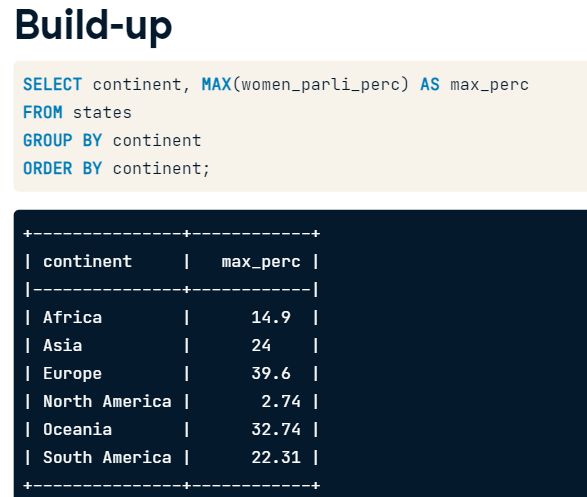
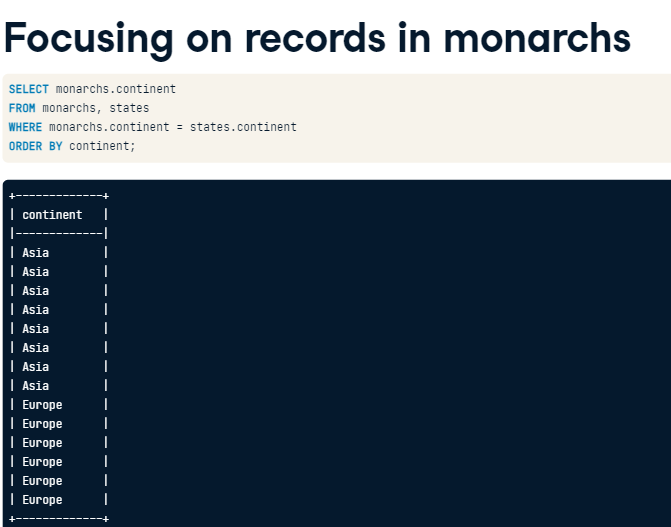
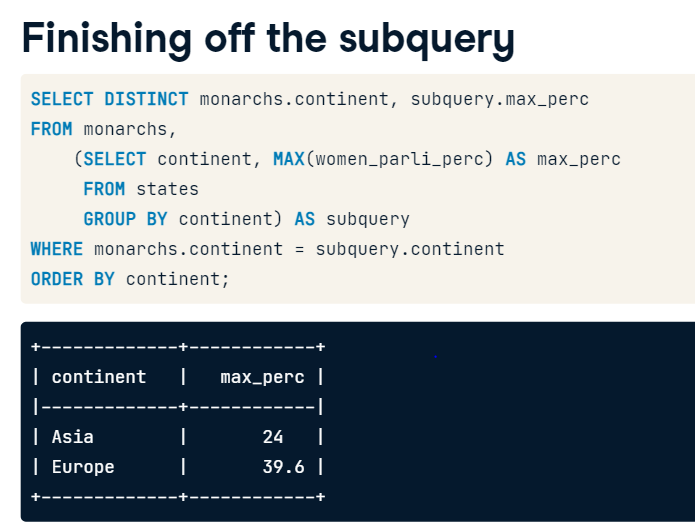

#### Subquery inside from
The last type of subquery you will work with is one inside of FROM.

You will use this to determine the number of languages spoken for each country, identified by the country's local name! (Note this may be different than the name field and is stored in the local_name field.)

- Begin by determining for each country code how many languages are listed in the languages table using SELECT, FROM, and GROUP BY.
- Alias the aggregated field as lang_num.

```
-- Select fields (with aliases)
SELECT code,COUNT(name) AS lang_num 
  -- From languages
  FROM languages
-- Group by code
GROUP BY code;
```
- Include the previous query (aliased as subquery) as a subquery in the FROM clause of a new query.
- Select the local name of the country from countries.
- Also, select lang_num from subquery.
- Make sure to use WHERE appropriately to match code in countries and in subquery.
- Sort by lang_num in descending order.

```
SELECT local_name, subquery.lang_num
  FROM countries,
  	(SELECT code, COUNT(*) AS lang_num
  	 FROM languages
  	 GROUP BY code) AS subquery
  WHERE countries.code = subquery.code
ORDER BY lang_num DESC;
```
- Now it's time to append the second part's query to the first part's query using AND and IN to obtain the name of the country, its continent, and the maximum inflation rate for each continent in 2015!
- For the sake of practice, change all joining conditions to use ON instead of USING (based upon the same column, code).
```
SELECT name, continent, inflation_rate
  FROM countries
  	INNER JOIN economies
    USING (code)
WHERE year = 2015;
```

Select the maximum inflation rate in 2015 AS max_inf grouped by continent using the previous step's query as a subquery in the FROM clause.

Thus, in your subquery you should:
- Create an inner join with countries on the left and economies on the right with USING (without aliasing your tables or columns).
- Retrieve the country name, continent, and inflation rate for 2015.
- Alias the subquery as subquery.

```
SELECT MAX(inflation_rate) AS max_inf
  FROM (
      SELECT name, continent, inflation_rate
      FROM countries
      INNER JOIN economies
      USING (code)
      WHERE year = 2015) AS subquery
GROUP BY continent;
```
- Now it's time to append your second query to your first query using AND and IN to obtain the name of the country, its continent, and the maximum inflation rate for each continent in 2015.
- For the sake of practice, change all joining conditions to use ON instead of USING.

```
SELECT name, continent, inflation_rate
  FROM countries
	INNER JOIN economies
	ON countries.code = economies.code
  WHERE year = 2015
    AND inflation_rate IN (
        SELECT MAX(inflation_rate) AS max_inf
        FROM (
             SELECT name, continent, inflation_rate
             FROM countries
             INNER JOIN economies
             ON countries.code = economies.code
             WHERE year = 2015) AS subquery
        GROUP BY continent);
 ```
*Let's test your understanding of the subqueries with a challenge problem! Use a subquery to get 2015 economic data for countries that do not have*

- gov_form of 'Constitutional Monarchy' or
- 'Republic' in their gov_form.
Here, gov_form stands for the form of the government for each country. Review the different entries for gov_form in the countries table.
```
SELECT code, inflation_rate, unemployment_rate	
  FROM economies
  WHERE year = 2015 AND code NOT IN
  	(SELECT code
  	 FROM countries
  	 WHERE (gov_form = 'Constitutional Monarchy' OR gov_form LIKE '%Republic%'))
ORDER BY inflation_rate;
```

